In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load breast cancer dataset
data = load_breast_cancer()

In [3]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

In [30]:
X.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
117,14.870,16.67,98.64,682.5,0.11620,0.16490,0.16900,0.08923,0.2157,0.06768,...,18.81,27.37,127.10,1095.0,0.1878,0.4480,0.47040,0.20270,0.3585,0.10650
214,14.190,23.81,92.87,610.7,0.09463,0.13060,0.11150,0.06462,0.2235,0.06433,...,16.86,34.85,115.00,811.3,0.1559,0.4059,0.37440,0.17720,0.4724,0.10260
213,17.420,25.56,114.50,948.0,0.10060,0.11460,0.16820,0.06597,0.1308,0.05866,...,18.07,28.07,120.40,1021.0,0.1243,0.1793,0.28030,0.10990,0.1603,0.06818
198,19.180,22.49,127.50,1148.0,0.08523,0.14280,0.11140,0.06772,0.1767,0.05529,...,23.36,32.06,166.40,1688.0,0.1322,0.5601,0.38650,0.17080,0.3193,0.09221
273,9.742,15.67,61.50,289.9,0.09037,0.04689,0.01103,0.01407,0.2081,0.06312,...,10.75,20.88,68.09,355.2,0.1467,0.0937,0.04043,0.05159,0.2841,0.08175


In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)


In [5]:
# Initialize KNN classifier with default parameters
knn_classifier = KNeighborsClassifier()

In [6]:
# Fit the model on the training data
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [7]:
# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

D:\Anaconda-16-FEB\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [8]:
# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

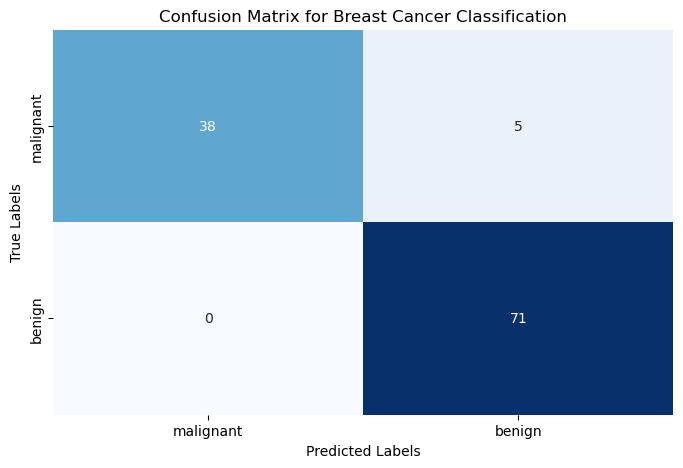

In [9]:
# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Breast Cancer Classification')
plt.show()

In [10]:
accuracy_score(y_test, y_pred)

0.956140350877193

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        43
           1       0.93      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



In [12]:
from sklearn.metrics import precision_score, recall_score

In [13]:
# Calculate precision for each class and overall precision with different averaging methods
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_weighted = precision_score(y_test, y_pred, average='weighted')

print(f'Micro-Averaged Precision: {precision_micro}')
print(f'Macro-Averaged Precision: {precision_macro}')
print(f'Weighted-Averaged Precision: {precision_weighted}')

Micro-Averaged Precision: 0.956140350877193
Macro-Averaged Precision: 0.9671052631578947
Weighted-Averaged Precision: 0.9590258541089566


In [14]:
# Calculate macro-averaged recall
macro_recall = recall_score(y_test, y_pred, average='macro')

print(f'Macro-Averaged Recall: {macro_recall}')

# Calculate micro-averaged recall
micro_recall = recall_score(y_test, y_pred, average='micro')

print(f'Micro-Averaged Recall: {micro_recall}')

# Calculate macro-averaged recall
weighted_recall = recall_score(y_test, y_pred, average='weighted')

print(f'Weighted-Averaged Recall: {weighted_recall}')

Macro-Averaged Recall: 0.9418604651162791
Micro-Averaged Recall: 0.956140350877193
Weighted-Averaged Recall: 0.956140350877193


In [ ]:
u